In [22]:
import pandas as pd
df = pd.read_excel('heartRisk.xlsx')
df.head()

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [23]:
df1 = pd.DataFrame(df, columns = ['Systolic', 'Cholesterol'])
print(df1.head())

   Systolic  Cholesterol
0       101          181
1       167          155
2       181          147
3       145          166
4       134          199


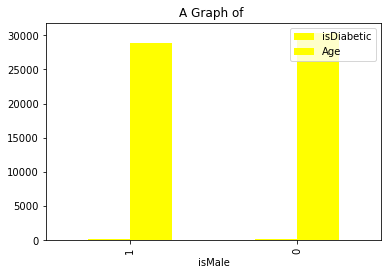

In [24]:
df2 = df[['isMale','isDiabetic','Age']]
df2_group = df2.groupby('isMale')
summation = df2_group.sum()

data = pd.DataFrame(data = summation)
result = data.sort_values(by=['Age'], ascending = True)
myplot = result.plot(kind = 'bar', rot = 90, color = "yellow", title = "A Graph of ", legend = 'lower left')


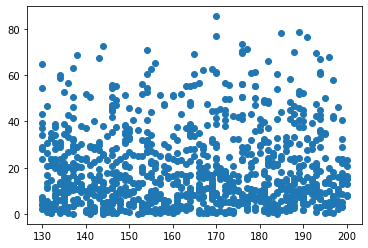

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

risk_x = df[['Cholesterol']]
risk_y = df[['Risk']]
plt.scatter(risk_x, risk_y)

     Cholesterol
149          171
755          180
868          152
891          194
616          164
..           ...
979          179
274          166
791          160
163          135
748          134

[800 rows x 1 columns]


     Risk
149   1.5
755  41.0
868  45.1
891  28.8
616  28.0
..    ...
979  47.3
274  10.1
791  16.3
163  15.9
748  29.0

[800 rows x 1 columns]


     Cholesterol
600          135
215          184
778          184
486          150
89           131
..           ...
280          133
922          140
888          161
705          174
196          138

[200 rows x 1 columns]


The predicted Risk value for Cholesterol = 60 is:  [[16.3567083]]
Coefficients: 
 [[0.03468243]]


Mean squared error:  257.75041047524644
Coefficient of determination:  -0.0006392685895164618


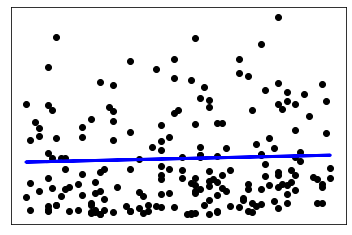

In [26]:
X_train,X_test,y_train,y_test=train_test_split(risk_x, risk_y,test_size=0.2)
print(X_train)
print("\n")
print(y_train)
print("\n")
print(X_test)
 
regr = LinearRegression()
 

regr.fit(X_train, y_train)
 

y_pred = regr.predict(X_test)
y_pred2 = regr.predict([[60]])
print("\n")
print("The predicted Risk value for Cholesterol = 60 is: ", y_pred2)
 

print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
 
 # Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()



In [27]:
import statsmodels.api as sm

risk1_x = df[['isMale', 'isBlack' , 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age', 'Systolic', 'Cholesterol','HDL']]
risk1_y = df[['Risk']]
 
#Split the dataset into training and testing sets (80%:20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(risk1_x, risk1_y, test_size=0.2)
print(X_train1)
print("\n")
print(y_train1)
print("\n")
print(X_test1)
 
#Create linear regression object
regr = LinearRegression()
 
# Train the model using the training sets 
regr.fit(X_train1, y_train1)
 
# Make predictions using the testing set
y_pred1 = regr.predict(X_test1)
 
#Make prediction for the following:
pisMale = 1
pisBlack = 0
pisSmoker = 0
pisDiabetic = 1
pisHypertensive = 1
pAge = 65
pSystolic = 145
pCholesterol = 182
pHDL = 43
print("\n")
print ('Predicted Risk value: ', regr.predict([[pisMale, pisBlack, pisSmoker, pisDiabetic, pisHypertensive, pAge, pSystolic, 
                                             pCholesterol, pHDL]]))
print("\n")
 
# The coefficients
print('Coefficients: \n', regr.coef_)
print("\n")
 
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test1, y_pred1))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test1, y_pred1))
 
#Use statsmodel for model summary
risk1_x = sm.add_constant(risk1_x)
model = sm.OLS(risk1_y, risk1_x).fit()
predictions = model.predict(risk1_x)
print_model = model.summary()
print(print_model)


     isMale  isBlack  isSmoker  isDiabetic  isHypertensive  Age  Systolic  \
278       1        1         1           0               1   70       120   
466       0        1         1           1               0   66       156   
555       1        1         1           1               1   78       114   
828       0        0         1           0               0   47       198   
185       1        1         0           0               1   72       158   
..      ...      ...       ...         ...             ...  ...       ...   
915       1        0         1           0               1   42       125   
21        1        1         0           0               0   74        99   
130       0        0         0           1               0   56       114   
650       0        0         0           0               0   48       151   
167       1        0         0           0               1   44       169   

     Cholesterol  HDL  
278          176   84  
466          130   80  
555

In [28]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

print(df.describe())
print("\n")


           isMale      isBlack     isSmoker   isDiabetic  isHypertensive  \
count  1000.00000  1000.000000  1000.000000  1000.000000     1000.000000   
mean      0.49000     0.530000     0.516000     0.522000        0.495000   
std       0.50015     0.499349     0.499994     0.499766        0.500225   
min       0.00000     0.000000     0.000000     0.000000        0.000000   
25%       0.00000     0.000000     0.000000     0.000000        0.000000   
50%       0.00000     1.000000     1.000000     1.000000        0.000000   
75%       1.00000     1.000000     1.000000     1.000000        1.000000   
max       1.00000     1.000000     1.000000     1.000000        1.000000   

               Age     Systolic  Cholesterol          HDL         Risk  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     59.107000   144.249000   164.043000    59.603000    19.667000  
std      11.536492    31.774528    20.329891    23.863505    17.043941  
min      40.000000    9

In [32]:
feature_cols =  ['isMale', 'isBlack' , 'isSmoker', 'isDiabetic', 'isHypertensive', 'Age', 'Systolic', 'Cholesterol','HDL']
risk2_x = df[feature_cols] 
risk2_y = df['Risk'] 

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
risk2_y = lab_enc.fit_transform(risk2_y)

X_train2, X_test2, y_train2, y_test2 = train_test_split(risk2_x, risk2_y, test_size=0.30, random_state=1)

clf = DecisionTreeClassifier()

clf = clf.fit(X_train2,y_train2)
y_pred = clf.predict(X_test2)

print("\n")
print("Accuracy for 70% training set and 30% test set:",
          metrics.accuracy_score(y_test2, y_pred))






Accuracy for 70% training set and 30% test set: 0.0033333333333333335
